In [24]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text


In [25]:
# open the excel file countries_pop_land_below_5m_final.xlsx
# and read the data into a pandas dataframe
df = pd.read_excel('countries_pop_land_below_5m_final.xlsx')
df.columns
#df['Density'] = df['Population Below 5m'] / df['Land Area Below 5m']
#print the countries as a python list
sids_list = [
    'Antigua and Barbuda',
    'Bahamas, The',
    'Barbados',
    'Cabo Verde',
    'Comoros',
        'Cook Islands',
    'Cuba',
    'Dominica',
    'Dominican Republic',
    'Fiji',
    'Grenada',
    'Guinea-Bissau',
    'Guyana',
    'Haiti',
    'Jamaica',
    'Kiribati',
    'Maldives',
    'Marshall Islands',
    'Mauritius',
    'Micronesia, Fed. Sts.',
    'Nauru',
    'Palau',
    'Papua New Guinea',
    'Saint Kitts and Nevis',
    'Saint Lucia',
    'Saint Vincent and the Grenadines',
    'Samoa',
    'São Tomé and Príncipe',
    'Seychelles',
    'Singapore',
    'Solomon Islands',
    'Suriname',
    'Timor-Leste',
    'Tonga',
    'Trinidad and Tobago',
    'Tuvalu',
    'Vanuatu'
]

non_sids_islands = [
    'Aruba',
    'Bermuda',
    'Cayman Islands',
    'Channel Islands',
    'American Samoa',
    'Curaçao',
    'Faeroe Islands',
    'French Polynesia',
    'Greenland',
    'Guam',
    'Hong Kong SAR, China',
    'Isle of Man',
    'Macao SAR, China',
    'New Caledonia',
    'Northern Mariana Islands',
    'Puerto Rico',
    'Sint Maarten (Dutch part)',
    'St. Martin (French part)',
    'Turks and Caicos Islands',
    'Virgin Islands (U.S.)',
    'Bahrain'
]

posx and posy should be finite values


Aruba 29.6 29.6
Kiribati 96.7 95.2
Macao SAR, China 35.4 79.9
Maldives 100.0 100.0
Marshall Islands 99.0 99.4
Micronesia, Fed. Sts. 33.4 54.9
Monaco nan 100.0
Nauru 40.4 40.4
Bahamas, The 72.0 46.5
Netherlands 58.5 61.3
Northern Mariana Islands 28.1 39.3
Bahrain 39.0 66.6
Palau 21.4 55.6
Seychelles 43.9 41.3
Suriname 3.4 68.2
Tonga 40.5 31.3
Turks and Caicos Islands 53.3 53.3
Tuvalu 100.0 100.0
Vietnam 17.5 42.8
Virgin Islands (U.S.) 31.0 21.9
Bermuda 82.3 82.3
Cayman Islands 60.3 59.6
Cook Islands 87.9 62.0
French Polynesia 37.6 19.8
Antigua and Barbuda 32.4 32.3
Gibraltar 100.0 100.0
Greenland 16.3 52.2


posx and posy should be finite values
posx and posy should be finite values


<Figure size 1000x1000 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values


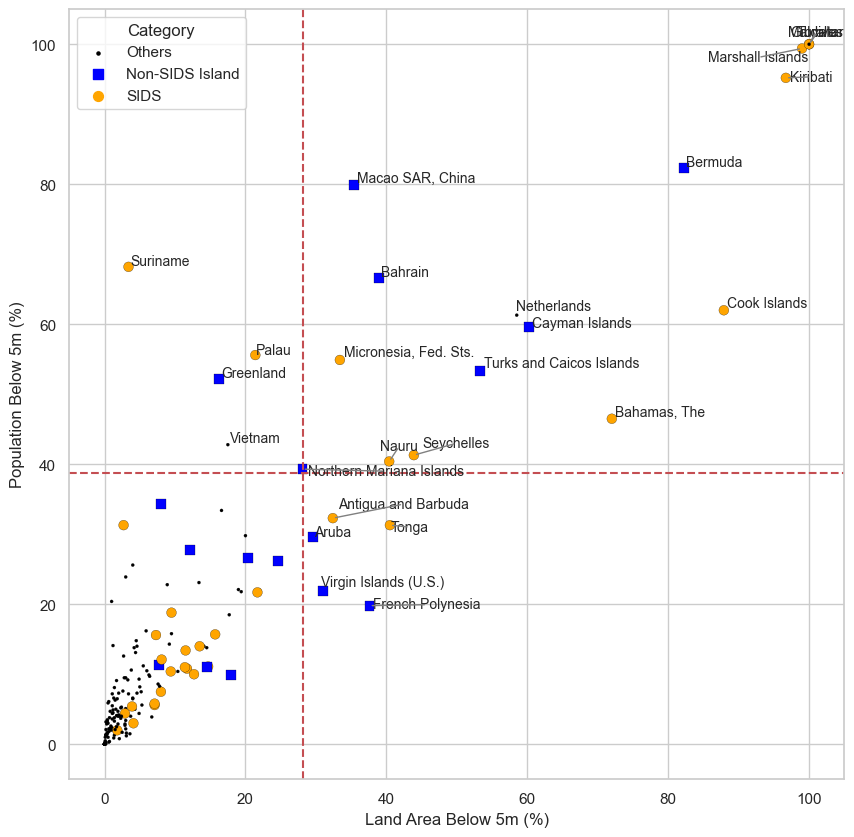

In [26]:
# set_theme whitegrid
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 10))

# Add a new column 'Category' to classify each country
df['Category'] = df['Country'].apply(
    lambda x: 'SIDS' if x in sids_list else ('Non-SIDS Island' if x in non_sids_islands else 'Others')
)


# Define the marker styles, palette, and size for each category
markers = {'SIDS': 'o', 'Non-SIDS Island': 's', 'Others': 'o'}
palette = {'SIDS': 'orange', 'Non-SIDS Island': 'blue', 'Others': 'black'}
sizes = {'SIDS': 50, 'Non-SIDS Island': 50, 'Others': 5}  # Define size mapping

# Create scatterplot
plt.figure(figsize=(10, 10))
ax = sns.scatterplot(
    x='Land Area Below 5m', y='Population Below 5m', data=df,
    hue='Category', style='Category', markers=markers, palette=palette,
    size='Category', sizes=sizes, edgecolor='black'
)

# Draw lines to separate the data into 4 quadrants at 90% (instead of 75%) for both axes
plt.axvline(df['Land Area Below 5m'].quantile(0.90), color='r', linestyle='--')
plt.axhline(df['Population Below 5m'].quantile(0.90), color='r', linestyle='--')

# List to store text objects for adjust_text
TEXTS = []

# Label data that is at least 90% in either axis
for i, row in df.iterrows():
    if row['Land Area Below 5m'] > df['Land Area Below 5m'].quantile(0.90) or row['Population Below 5m'] > df['Population Below 5m'].quantile(0.90):
        print(row['Country'], row['Land Area Below 5m'], row['Population Below 5m'])
        text_obj = ax.text(row['Land Area Below 5m'], row['Population Below 5m'], row['Country'], fontsize=10)
        TEXTS.append(text_obj)

# Adjust the text to prevent overlap, and add lines to connect labels
adjust_text(
    TEXTS,
    expand_points=(2, 2),  # Expand text away from points
    arrowprops=dict(arrowstyle='-', color='gray', lw=1)  # Use a line of 1pt thick, gray, no arrowheads
)

# Add (%) to the axis labels
plt.xlabel('Land Area Below 5m (%)')
plt.ylabel('Population Below 5m (%)')
# save svg as figure_7.svg
plt.savefig('figure_7.svg')
# Show the plot
plt.show()